In [65]:
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
%matplotlib inline
seed = 0
np.random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)
import os

import pandas as pd
import matplotlib.pyplot as plt
from callbacks import all_callbacks

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

from qkeras.qlayers import QDense, QActivation
from qkeras.quantizers import quantized_bits, quantized_relu
import tensorflow.compat.v1 as tf1
from qkeras.utils import model_save_quantized_weights

from tensorflow_model_optimization.python.core.sparsity.keras import prune, pruning_callbacks, pruning_schedule
from tensorflow_model_optimization.sparsity.keras import strip_pruning


from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import random
import math
from sklearn.datasets import fetch_openml


from tensorflow_model_optimization.python.core.sparsity.keras import prune, pruning_callbacks, pruning_schedule
from tensorflow_model_optimization.sparsity.keras import strip_pruning
from qkeras.utils import model_save_quantized_weights, load_qmodel
import hls4ml
import qkeras.utils


from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pymoo


In [2]:
from typing import List,Callable
from collections import namedtuple
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter




In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers import Activation
from qkeras.qlayers import QDense, QActivation
from qkeras.quantizers import quantized_bits, quantized_relu
import random

from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU' or x.device_type == 'CPU']
get_available_devices()

2024-10-23 01:09:25.153052: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


['/device:CPU:0']

### When the minimize function is used x is multidimensional as it contains a number of solutions equal to the number of the population of the algorithm. The estimator is changed to have a subfunction to  accept an array of models and return the normalised sum of all 3 metrics(FF,LUT,DSP). When we want to use the _evaluate function indepedently, we have to convert x to a 2D array for it to work even if it contains only one set of variables

In [4]:
import create_pop as crp

import estimator.estimator as est
from importlib import reload
import jet_taggin_compare as jet_comp
import dse


In [68]:
reload(jet_comp)
reload(crp)
reload(est)
reload(dse)

<module 'dse' from '/home/dmitsas/Downloads/backup/src/dse.py'>

In [54]:
def preprocess_jet_tagging():
    data = fetch_openml('hls4ml_lhc_jets_hlf')
    X, y = data['data'], data['target']
    le = LabelEncoder()
    y = le.fit_transform(y)
    y = to_categorical(y, 5)
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train,X_test,Y_train,Y_test

In [55]:
def preprocess_cardio():
    df = pd.read_csv('./dataset.csv', sep = ';')
    X = df.drop('Y', axis = 1).values
    y = df.Y
    le = LabelEncoder()
    y = le.fit_transform(y)
    y = to_categorical(y, 3)
    X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=42)
    sc = MinMaxScaler(feature_range=(0,0.9))
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    print(X_test.shape)
    print(Y_test.shape)
    return X_train,X_test,Y_train,Y_test

In [56]:
def cardio_compare(hls_model,X_test,Y_test):
    y_pred = hls_model.predict(X_test)
    y_pred = to_categorical(np.argmax(y_pred,axis=1),Y_test.shape[1])
    accuracy = accuracy_score(Y_test,y_pred)
    return accuracy

In [57]:
X_train,X_test,Y_train,Y_test = preprocess_cardio()


(638, 21)
(638, 3)


In [69]:
%%time
########### User setup ################
#### if a population is already available then the sampling of the algorithm should be set to the parameters
#####List of devices "Z7007S" ,"Z7012S" ,"Z7014S", "Z7010", "Z7015", "Z7020" ###########
dirname = "./dse_models/models_12" + "/model_"
pop_size = 2
layer_in = 21
layer_out = 3
problem = dse.dse(layer_in,layer_out,X_train,X_test,Y_train,Y_test,batch_size = 64,test_compare=cardio_compare,dirname=dirname,only_est=False,device = "Z7010")

CPU times: user 106 µs, sys: 0 ns, total: 106 µs
Wall time: 247 µs


In [70]:
problem.minimize(problem,pop_size,('n_gen',2))
#np.savetxt(dirname + "results.txt",problem.get_opt_solutions())

Epoch 1/10
 1/18 [>.............................] - ETA: 47s - loss: 1.2167 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0020s vs `on_train_batch_end` time: 0.0089s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.98296, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.98296, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 41ms/step - loss: 1.1140 - accuracy: 0.5108 - val_loss: 0.9830 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.9981 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.98296 to 0.69194, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 40]
Layer name: relu1, layer type: Activation, input shapes: [[None, 40]], output shape: [None, 40]
Layer name: fc2, layer type: QDense, input shapes: [[None, 40]], output shape: [None, 48]
Layer name: relu2, layer type: Activation, input shapes: [[None, 48]], output shape: [None, 48]
Layer name: fc3, layer type: QDense, input shapes: [[None, 48]], output shape: [None, 22]
Layer name: relu3, layer type: Activation, input shapes: [[None, 22]], output shape: [None, 22]
Layer name: output, layer type: QDense, input shapes: [[None, 22]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_12/model_0


Epoch 1/10
 1/18 [>.............................] - ETA: 1:45 - loss: 1.1968 - accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0023s vs `on_train_batch_end` time: 0.0113s). Check your callbacks.


15/18 [========================>.....] - ETA: 0s - loss: 1.0974 - accuracy: 0.5885  
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.93972, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.93972, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 7s 72ms/step - loss: 1.0795 - accuracy: 0.6201 - val_loss: 0.9397 - val_accuracy: 0.8065 - lr: 0.0010
Epoch 2/10
15/18 [========================>.....] - ETA: 0s - loss: 0.8915 - accuracy: 0.7688
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.93972 to 0.71581, sav

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 62]
Layer name: relu1, layer type: Activation, input shapes: [[None, 62]], output shape: [None, 62]
Layer name: fc2, layer type: QDense, input shapes: [[None, 62]], output shape: [None, 29]
Layer name: relu2, layer type: Activation, input shapes: [[None, 29]], output shape: [None, 29]
Layer name: fc3, layer type: QDense, input shapes: [[None, 29]], output shape: [None, 27]
Layer name: relu3, layer type: Activation, input shapes: [[None, 27]], output shape: [None, 27]
Layer name: output, layer type: QDense, input shapes: [[None, 27]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_12/model_1
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

Epoch 1/10
 1/18 [>.............................] - ETA: 49s - loss: 1.0516 - accuracy: 0.8125WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0021s vs `on_train_batch_end` time: 0.0080s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.79257, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.79257, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 4s 43ms/step - loss: 0.9443 - accuracy: 0.7706 - val_loss: 0.7926 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.8097 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.79257 to 0.63603, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 62]
Layer name: relu1, layer type: Activation, input shapes: [[None, 62]], output shape: [None, 62]
Layer name: fc2, layer type: QDense, input shapes: [[None, 62]], output shape: [None, 29]
Layer name: relu2, layer type: Activation, input shapes: [[None, 29]], output shape: [None, 29]
Layer name: fc3, layer type: QDense, input shapes: [[None, 29]], output shape: [None, 22]
Layer name: relu3, layer type: Activation, input shapes: [[None, 22]], output shape: [None, 22]
Layer name: output, layer type: QDense, input shapes: [[None, 22]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_12/model_0


Epoch 1/10
 1/18 [>.............................] - ETA: 46s - loss: 1.0446 - accuracy: 0.8125WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0018s vs `on_train_batch_end` time: 0.0080s). Check your callbacks.



***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 1: val_loss improved from inf to 0.76299, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.76299, saving model to arrythmia_classification_prune_new/KERAS_check_best_model_weights.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last.h5

Epoch 1: saving model to arrythmia_classification_prune_new/KERAS_check_model_last_weights.h5

***callbacks end***

18/18 [==============================] - 3s 40ms/step - loss: 0.9409 - accuracy: 0.7706 - val_loss: 0.7630 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 2/10
 1/18 [>.............................] - ETA: 0s - loss: 0.7944 - accuracy: 0.7812
***callbacks***
saving losses to arrythmia_classification_prune_new/losses.log

Epoch 2: val_loss improved from 0.76299 to 0.64340, saving model to arrythmia_classification_prune_new/KERAS_check_best_model.h5

Epoch 2: 

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: fc1, layer type: QDense, input shapes: [[None, 21]], output shape: [None, 40]
Layer name: relu1, layer type: Activation, input shapes: [[None, 40]], output shape: [None, 40]
Layer name: fc2, layer type: QDense, input shapes: [[None, 40]], output shape: [None, 48]
Layer name: relu2, layer type: Activation, input shapes: [[None, 48]], output shape: [None, 48]
Layer name: fc3, layer type: QDense, input shapes: [[None, 48]], output shape: [None, 27]
Layer name: relu3, layer type: Activation, input shapes: [[None, 27]], output shape: [None, 27]
Layer name: output, layer type: QDense, input shapes: [[None, 27]], output shape: [None, 3]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 3]], output shape: [None, 3]
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 21]], output shape: 

Done
./dse_models/models_12/model_1
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [72]:
problem.plot_parento_front()

In [73]:
problem.get_opt_solutions()

### Run DSE on models with available parameters and solutions

In [27]:
from tensorflow.keras.models import load_model
from qkeras.utils import _add_supported_quantized_objects
import qkeras.qtools.qtools_util
import qkeras.estimate
loaded_models = []
co = {}
_add_supported_quantized_objects(co)
for model_no in range(pop_size):

#loaded_models.append(load_model(dirname + "/prec_" + str(pre) + "/model_" + str(model_no) + '/KERAS_check_best_model.h5', custom_objects=co))
#model = 
    loaded_models.append(load_model(dirname + str(model_no) + "/KERAS_check_best_model.h5",custom_objects=co))

/home/dmitsas/anaconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer LecunUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [46]:
reload(est)
import pymoo_utils
reload(pymoo_utils)
reload(dse)


<module 'dse' from '/home/dmitsas/Downloads/backup/src/dse.py'>

In [29]:
def recover_pymoo(dirname,pop_size,):
    par = [[] for x in range(pop_size)]
    #par = []
    for i in range(pop_size):
        with open(dirname + str(i) + "/parameters.txt",'r') as f:
            for lines in f:

                par[i].append(lines)
                
    par = np.array(par)

    x = []
    for i in range(pop_size):
        s = par[i,0].split(" ")
        s = np.array(s)
        s = s.astype(float).astype(int)
        x.append(s)
    x = np.array(x)

    acc = [[] for x in range(pop_size)]
    #par = []
    for i in range(pop_size):
        with open(dirname + str(i) + "/accuracy.txt",'r') as f:
            for lines in f:
                acc[i].append(lines)           
    acc = np.array(acc)
    f1 = []
    for i in range(pop_size):
        s = acc[i,0]
        s = np.array(s)
        s = s.astype(float)
        f1.append(s)
    f1 = np.array(f1)


    size = [[] for x in range(pop_size)]
    for i in range(pop_size):
        with open(dirname + str(i) + '/reuse_' + str(RF) + "/size.txt",'r') as f:
            for lines in f:
                size[i].append(lines)

    size = np.array(size)
    f2 = []
    for i in range(pop_size):
        s = size[i,0]
        s = np.array(s)
        s = s.astype(float)
        f2.append(s)
    f2 = np.array(f2)
    f2.shape

    f = np.concatenate(([f1],[f2]))
    return x,f

In [30]:
RF = 1

In [32]:
########### User setup ################
###########This is used when the population is already available ##########
#dirname = "./dse_models/models_8" + "/model_"
#dirname = "./dse_models/models_car_2/" +"model_"
pop_size = 50
x,f = recover_pymoo(dirname,pop_size)
#RF=10
layer_in = 16
layer_out = 5
#algorithm = NSGA2(pop_size = pop_size,sampling=x)
problem = dse.dse(layer_in,layer_out,X_train,X_test,Y_train,Y_test,jet_comp.compare_data,population=f,parameters=x,dirname=dirname,only_est=True,models=loaded_models,reuse=RF,device = "Z7020")


In [33]:
%%time
res = problem.minimize(problem,pop_size,('n_gen',1),seed=1)
#np.savetxt(dirname + "/reuse_" + str(RF) + "\results.txt",problem.get_opt_solutions())

... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model


/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dmitsas/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.4.2. 

... quantizing model
-----------------------------------------------------------
... quantizing model
... quantizing model
... quantizing model
... quantizing model
-----------------------------------------------------------
CPU times: user 8.94 s, sys: 59.3 ms, total: 9 s
Wall time: 9.07 s


In [34]:
dirname

'./dse_models/models_11/model_'

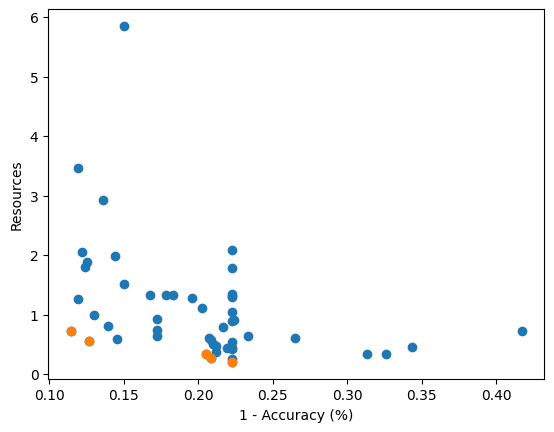

In [35]:
problem.plot_parento_front()

In [38]:
problem.get_fitting_solutions()

array([[0.87304075, 0.55679511],
       [0.79153605, 0.26327068],
       [0.88557994, 0.71640977],
       [0.79467085, 0.34395677],
       [0.77742947, 0.20317669]])